In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision
import numpy as np
import matplotlib.pyplot as plt

In [2]:
device = ""
if torch.cuda.is_available(): device = "cuda"
else: device = "cpu"

print("device used :- "+device)

device used :- cuda


In [3]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
])

train = torchvision.datasets.CIFAR10(root="./cifar10",train=True,download=True,transform=transform)
train_loader = torch.utils.data.DataLoader(train,batch_size=256,shuffle=True,num_workers = 4)

test = torchvision.datasets.CIFAR10(root="./cifar10",train=True,download=True,transform=transform)
test_loader = torch.utils.data.DataLoader(test,batch_size=256,shuffle=False,num_workers = 4)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
class Cnn(nn.Module):
    def __init__(self,network = nn.Sequential(
            nn.Conv2d(3, 6, 5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2),

            nn.Conv2d(6,16,5),
            nn.ReLU(),
            nn.MaxPool2d(2, 2), 

            nn.Flatten(), 
            nn.Linear(16*5*5,120),
            nn.ReLU(),
            nn.Linear(120,10))):
        super(Cnn, self).__init__()
        
        # 5 convolutional layers
        self.network = network
    def forward(self, x):
        x = self.network(x)
        return x

In [5]:
def adjust_learning_rate(optimizer, epoch):
    if epoch < 5: lr = 0.1
    elif epoch < 10: lr = 0.01
    else: lr = 0.001
    for param_group in optimizer.param_groups: 
        param_group['lr'] = lr
        
    return lr

In [6]:
def train(model,num_epochs,optimizer,criterion,adjustLr = True):
    # Train the model
    lost_lst = []
    for epoch in range(num_epochs):
        running_loss = 0.0
        for i, (inputs,labels) in enumerate(train_loader):
            inputs,labels = inputs.to(device),labels.to(device)
            optimizer.zero_grad()        
            # Forward + backward + optimize
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()    
            
            # Print statistics
            running_loss += loss.item()
            # if i % 200 == 199:    # Print every 200 mini-batches
        print('[%d] loss: %.3f' % (epoch + 1,running_loss / 200))
        lost_lst.append(running_loss/200)
                
    print('Finished training')
    return model,lost_lst

In [7]:
def plotGraph(x):
    s = len(x)
    x = np.asarray(x)
    y = np.arange(1,s+1)
    plt.xlabel("epoch number")
    plt.ylabel("Running Loss")   
    plt.plot(y,x)
    plt.show()

In [8]:
def test(model):
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs,labels = inputs.to(device),labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print('Accuracy of the network on the 10000 test images: %d %%' % (100 * correct / total))
    
    return 100*correct/total

[1] loss: 1.673
[2] loss: 1.448
[3] loss: 1.383
[4] loss: 1.327
[5] loss: 1.307
[6] loss: 1.256
[7] loss: 1.252
[8] loss: 1.227
[9] loss: 1.210
[10] loss: 1.202
[11] loss: 1.179
[12] loss: 1.173
[13] loss: 1.171
[14] loss: 1.151
[15] loss: 1.141
[16] loss: 1.147
[17] loss: 1.136
[18] loss: 1.129
[19] loss: 1.134
[20] loss: 1.131
Finished training
Accuracy of the network on the 10000 test images: 58 %


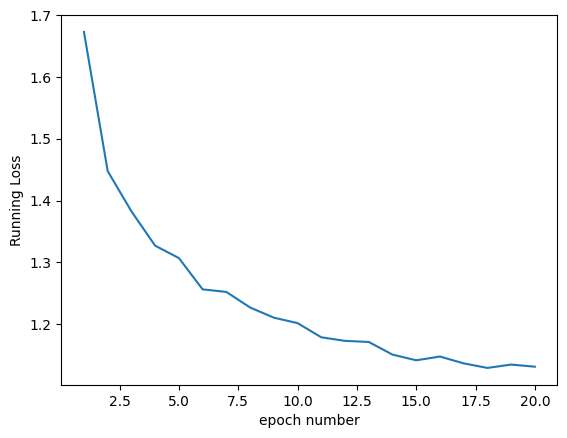

In [9]:
# Network 1
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Conv2d(6,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.ReLU(),
    nn.Linear(120,10))

model = Cnn(n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l)

[1] loss: 1.554
[2] loss: 1.286
[3] loss: 1.207
[4] loss: 1.160
[5] loss: 1.130
[6] loss: 1.093
[7] loss: 1.095
[8] loss: 1.063
[9] loss: 1.040
[10] loss: 1.039
[11] loss: 1.027
[12] loss: 1.024
[13] loss: 1.022
[14] loss: 1.025
[15] loss: 0.996
[16] loss: 1.008
[17] loss: 1.000
[18] loss: 0.996
[19] loss: 0.991
[20] loss: 0.974
Finished training
Accuracy of the network on the 10000 test images: 66 %


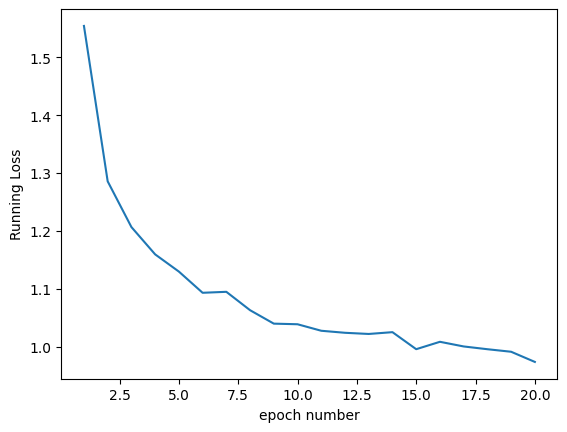

In [10]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l)

[1] loss: 1.938
[2] loss: 1.511
[3] loss: 1.343
[4] loss: 1.236
[5] loss: 1.170
[6] loss: 1.110
[7] loss: 1.060
[8] loss: 1.017
[9] loss: 0.972
[10] loss: 0.938
[11] loss: 0.898
[12] loss: 0.875
[13] loss: 0.841
[14] loss: 0.816
[15] loss: 0.783
[16] loss: 0.763
[17] loss: 0.740
[18] loss: 0.720
[19] loss: 0.697
[20] loss: 0.677
Finished training
Accuracy of the network on the 10000 test images: 77 %


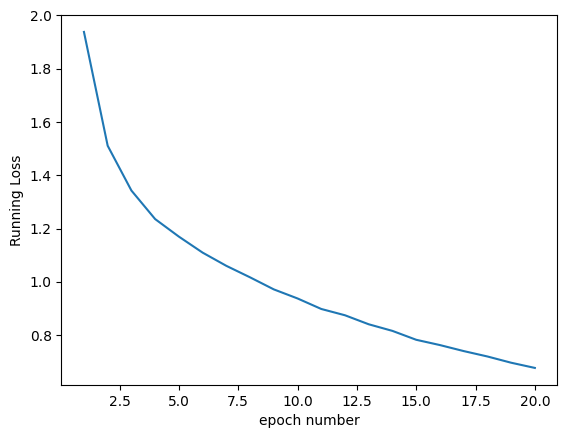

In [11]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l)

[1] loss: 2.170
[2] loss: 1.815
[3] loss: 1.608
[4] loss: 1.487
[5] loss: 1.415
[6] loss: 1.359
[7] loss: 1.309
[8] loss: 1.270
[9] loss: 1.233
[10] loss: 1.199
[11] loss: 1.165
[12] loss: 1.141
[13] loss: 1.114
[14] loss: 1.089
[15] loss: 1.069
[16] loss: 1.050
[17] loss: 1.029
[18] loss: 1.011
[19] loss: 0.996
[20] loss: 0.975
Finished training
Accuracy of the network on the 10000 test images: 65 %


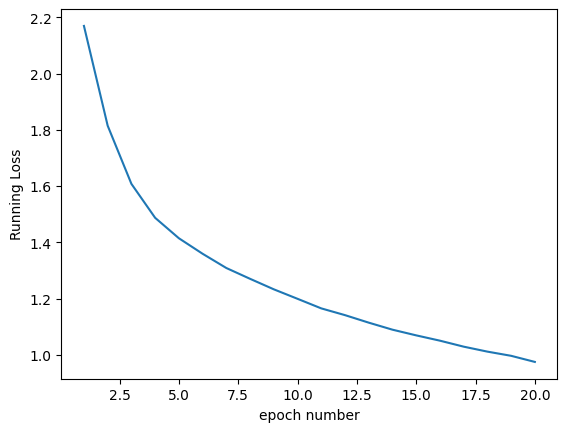

In [12]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.ReLU(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.996
[2] loss: 1.703
[3] loss: 1.577
[4] loss: 1.509
[5] loss: 1.442
[6] loss: 1.384
[7] loss: 1.341
[8] loss: 1.309
[9] loss: 1.273
[10] loss: 1.246
[11] loss: 1.219
[12] loss: 1.199
[13] loss: 1.176
[14] loss: 1.158
[15] loss: 1.140
[16] loss: 1.121
[17] loss: 1.105
[18] loss: 1.094
[19] loss: 1.079
[20] loss: 1.065
Finished training
Accuracy of the network on the 10000 test images: 62 %


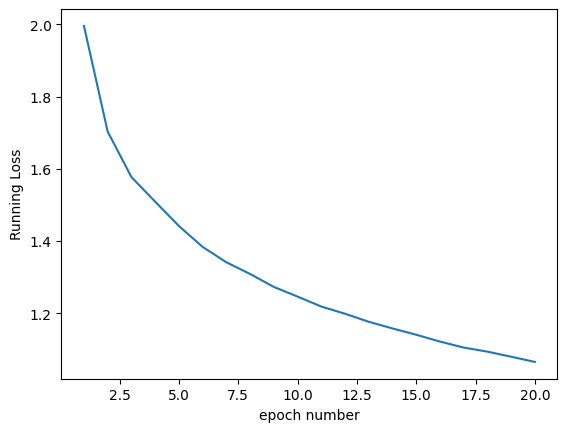

In [13]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.054
[2] loss: 1.044
[3] loss: 1.031
[4] loss: 1.022
[5] loss: 1.011
[6] loss: 1.000
[7] loss: 0.989
[8] loss: 0.985
[9] loss: 0.974
[10] loss: 0.962
[11] loss: 0.955
[12] loss: 0.948
[13] loss: 0.936
[14] loss: 0.931
[15] loss: 0.921
[16] loss: 0.914
[17] loss: 0.909
[18] loss: 0.897
[19] loss: 0.891
[20] loss: 0.885
Finished training
Accuracy of the network on the 10000 test images: 68 %


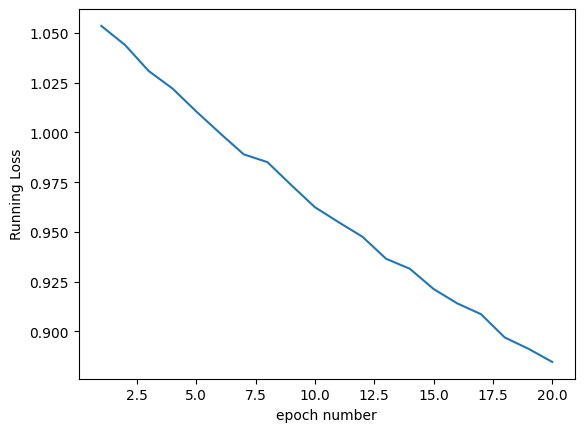

In [14]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model6 = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.253
[2] loss: 2.236
[3] loss: 2.149
[4] loss: 2.019
[5] loss: 1.918
[6] loss: 1.843
[7] loss: 1.785
[8] loss: 1.729
[9] loss: 1.677
[10] loss: 1.627
[11] loss: 1.588
[12] loss: 1.554
[13] loss: 1.523
[14] loss: 1.497
[15] loss: 1.473
[16] loss: 1.451
[17] loss: 1.436
[18] loss: 1.416
[19] loss: 1.401
[20] loss: 1.385
Finished training
Accuracy of the network on the 10000 test images: 49 %


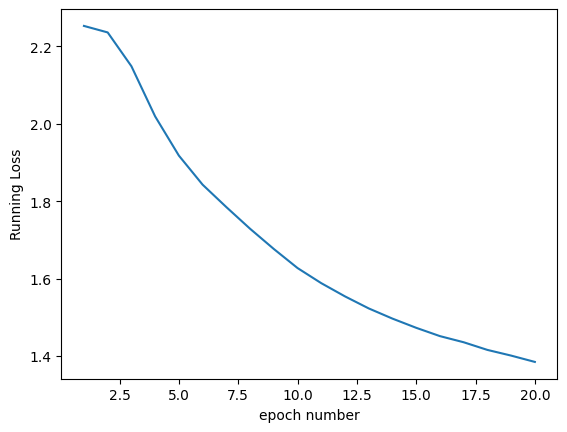

In [9]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.ReLU(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.198
[2] loss: 2.039
[3] loss: 1.955
[4] loss: 1.911
[5] loss: 1.876
[6] loss: 1.839
[7] loss: 1.794
[8] loss: 1.750
[9] loss: 1.713
[10] loss: 1.680
[11] loss: 1.649
[12] loss: 1.620
[13] loss: 1.595
[14] loss: 1.572
[15] loss: 1.551
[16] loss: 1.530
[17] loss: 1.512
[18] loss: 1.494
[19] loss: 1.477
[20] loss: 1.462
Finished training
Accuracy of the network on the 10000 test images: 46 %


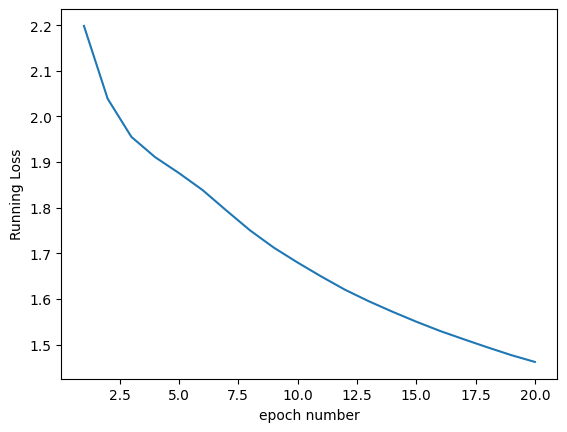

In [10]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.448
[2] loss: 1.435
[3] loss: 1.422
[4] loss: 1.410
[5] loss: 1.399
[6] loss: 1.387
[7] loss: 1.376
[8] loss: 1.367
[9] loss: 1.356
[10] loss: 1.348
[11] loss: 1.339
[12] loss: 1.331
[13] loss: 1.323
[14] loss: 1.316
[15] loss: 1.308
[16] loss: 1.301
[17] loss: 1.296
[18] loss: 1.289
[19] loss: 1.282
[20] loss: 1.275
Finished training
Accuracy of the network on the 10000 test images: 53 %


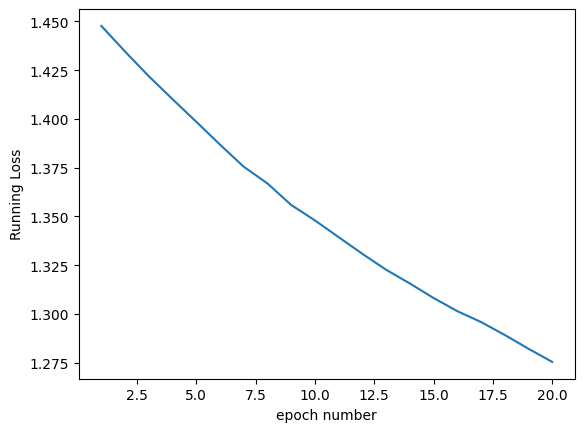

In [11]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model6 = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.025
[2] loss: 1.652
[3] loss: 1.473
[4] loss: 1.381
[5] loss: 1.307
[6] loss: 1.256
[7] loss: 1.207
[8] loss: 1.160
[9] loss: 1.121
[10] loss: 1.081
[11] loss: 1.055
[12] loss: 1.011
[13] loss: 0.987
[14] loss: 0.951
[15] loss: 0.934
[16] loss: 0.908
[17] loss: 0.875
[18] loss: 0.859
[19] loss: 0.838
[20] loss: 0.819
Finished training
Accuracy of the network on the 10000 test images: 70 %


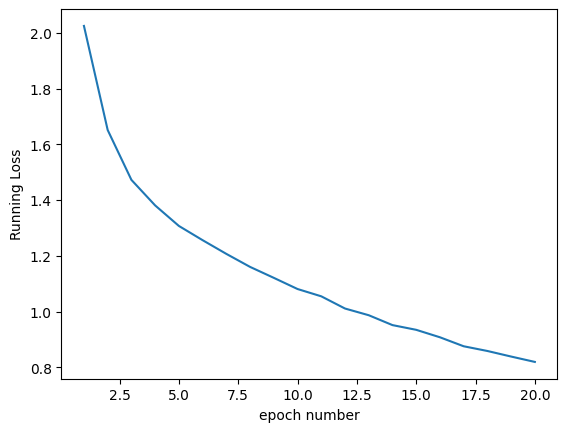

In [12]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.ReLU(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.873
[2] loss: 1.588
[3] loss: 1.478
[4] loss: 1.383
[5] loss: 1.312
[6] loss: 1.260
[7] loss: 1.215
[8] loss: 1.179
[9] loss: 1.150
[10] loss: 1.123
[11] loss: 1.099
[12] loss: 1.078
[13] loss: 1.055
[14] loss: 1.040
[15] loss: 1.022
[16] loss: 1.006
[17] loss: 0.988
[18] loss: 0.971
[19] loss: 0.956
[20] loss: 0.943
Finished training
Accuracy of the network on the 10000 test images: 65 %


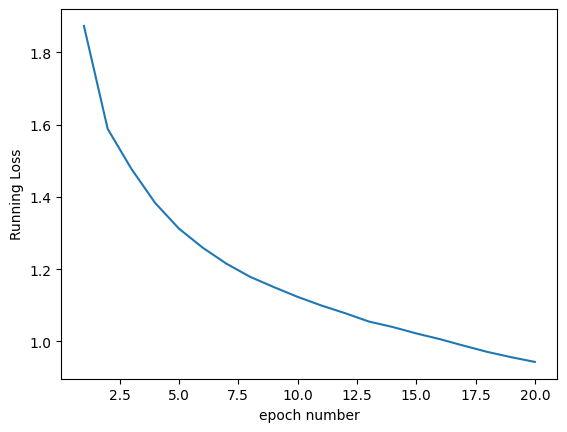

In [13]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Tanh(),
    nn.Linear(120,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 0.927
[2] loss: 0.910
[3] loss: 0.903
[4] loss: 0.887
[5] loss: 0.873
[6] loss: 0.864
[7] loss: 0.851
[8] loss: 0.835
[9] loss: 0.823
[10] loss: 0.818
[11] loss: 0.801
[12] loss: 0.792
[13] loss: 0.781
[14] loss: 0.766
[15] loss: 0.760
[16] loss: 0.746
[17] loss: 0.740
[18] loss: 0.725
[19] loss: 0.712
[20] loss: 0.706
Finished training
Accuracy of the network on the 10000 test images: 75 %


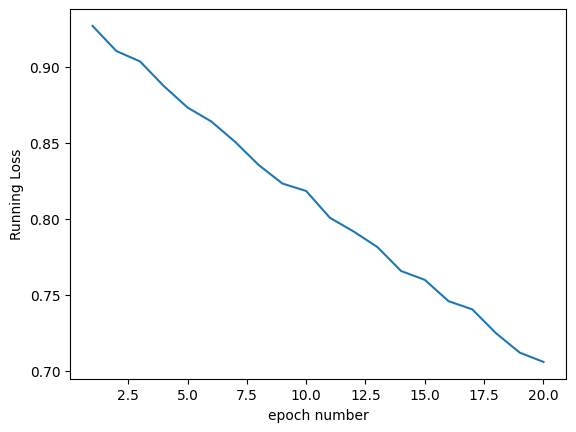

In [14]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(6,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(16*5*5,120),
    nn.Sigmoid(),
    nn.Linear(120,10)
)

model6 = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.934
[2] loss: 1.473
[3] loss: 1.379
[4] loss: 1.338
[5] loss: 1.292
[6] loss: 1.254
[7] loss: 1.237
[8] loss: 1.209
[9] loss: 1.198
[10] loss: 1.170
[11] loss: 1.149
[12] loss: 1.140
[13] loss: 1.120
[14] loss: 1.109
[15] loss: 1.101
[16] loss: 1.078
[17] loss: 1.071
[18] loss: 1.056
[19] loss: 1.046
[20] loss: 1.037
Finished training
Accuracy of the network on the 10000 test images: 63 %


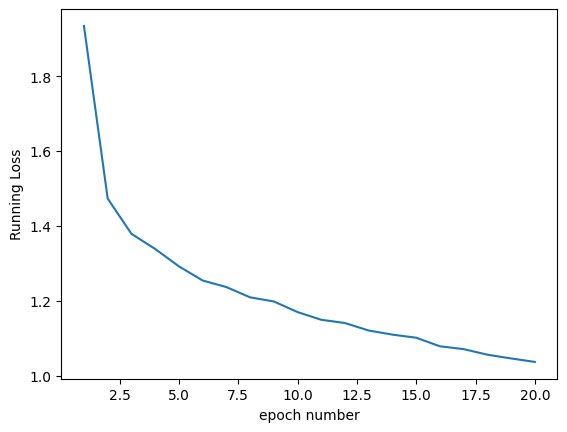

In [15]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size = 3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64,kernel_size = 3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size = 3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.ReLU(),
    nn.Linear(512,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.962
[2] loss: 1.635
[3] loss: 1.538
[4] loss: 1.478
[5] loss: 1.482
[6] loss: 1.438
[7] loss: 1.411
[8] loss: 1.432
[9] loss: 1.376
[10] loss: 1.368
[11] loss: 1.351
[12] loss: 1.360
[13] loss: 1.389
[14] loss: 1.369
[15] loss: 1.369
[16] loss: 1.356
[17] loss: 1.365
[18] loss: 1.378
[19] loss: 1.389
[20] loss: 1.353
Finished training
Accuracy of the network on the 10000 test images: 50 %


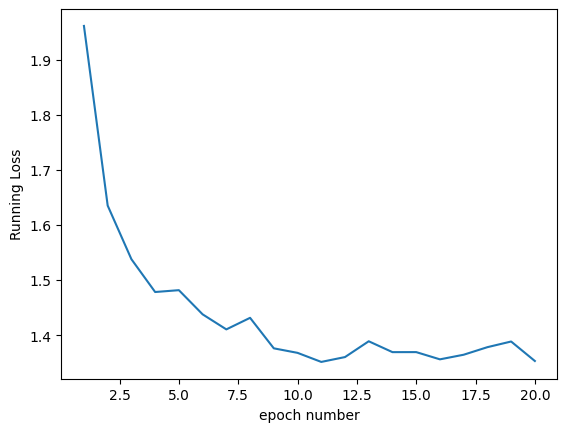

In [16]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size = 3,stride=1,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64,kernel_size = 3,stride=1,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size = 3,stride=1,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.Tanh(),
    nn.Linear(512,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.385
[2] loss: 2.312
[3] loss: 2.316
[4] loss: 2.309
[5] loss: 2.323
[6] loss: 2.315
[7] loss: 2.319
[8] loss: 2.330
[9] loss: 2.313
[10] loss: 2.316
[11] loss: 2.320
[12] loss: 2.316
[13] loss: 2.313
[14] loss: 2.322
[15] loss: 2.313
[16] loss: 2.321
[17] loss: 2.311
[18] loss: 2.320
[19] loss: 2.313
[20] loss: 2.325
Finished training
Accuracy of the network on the 10000 test images: 10 %


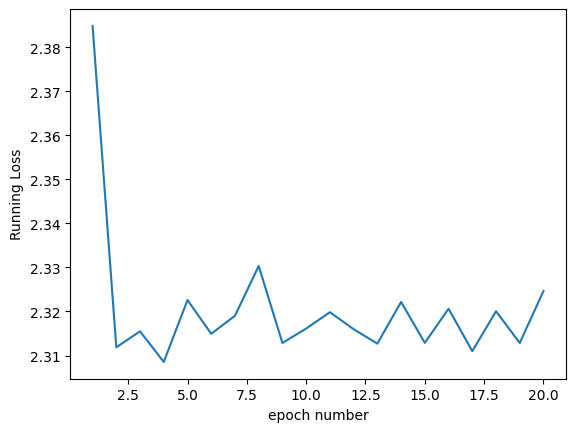

In [17]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size = 3,stride=1,padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64,kernel_size = 3,stride=1,padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size = 3,stride=1,padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.Sigmoid(),
    nn.Linear(512,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.219
[2] loss: 1.909
[3] loss: 1.612
[4] loss: 1.448
[5] loss: 1.351
[6] loss: 1.266
[7] loss: 1.191
[8] loss: 1.120
[9] loss: 1.055
[10] loss: 0.989
[11] loss: 0.942
[12] loss: 0.887
[13] loss: 0.838
[14] loss: 0.796
[15] loss: 0.749
[16] loss: 0.705
[17] loss: 0.668
[18] loss: 0.625
[19] loss: 0.585
[20] loss: 0.550
Finished training
Accuracy of the network on the 10000 test images: 81 %


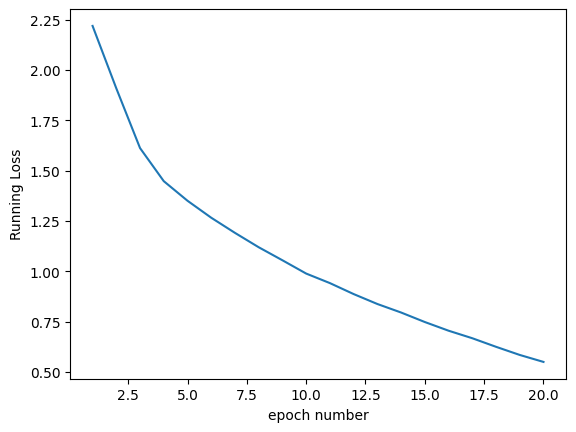

In [21]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size = 3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64,kernel_size = 3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size = 3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.ReLU(),
    nn.Linear(512,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.968
[2] loss: 1.601
[3] loss: 1.446
[4] loss: 1.330
[5] loss: 1.241
[6] loss: 1.164
[7] loss: 1.094
[8] loss: 1.035
[9] loss: 0.976
[10] loss: 0.927
[11] loss: 0.885
[12] loss: 0.846
[13] loss: 0.807
[14] loss: 0.778
[15] loss: 0.751
[16] loss: 0.721
[17] loss: 0.693
[18] loss: 0.669
[19] loss: 0.644
[20] loss: 0.623
Finished training
Accuracy of the network on the 10000 test images: 78 %


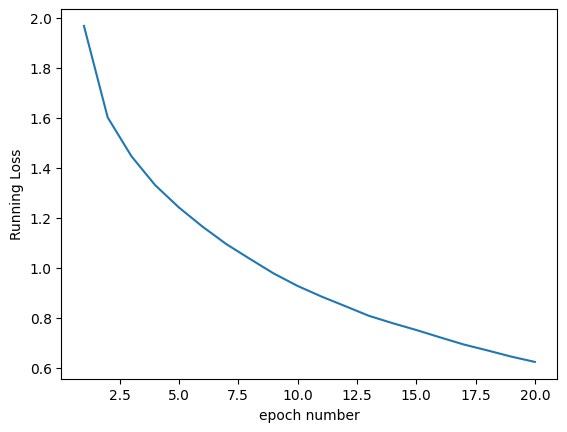

In [22]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size = 3,stride=1,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64,kernel_size = 3,stride=1,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size = 3,stride=1,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.Tanh(),
    nn.Linear(512,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.263
[2] loss: 2.263
[3] loss: 2.262
[4] loss: 2.262
[5] loss: 2.262
[6] loss: 2.261
[7] loss: 2.261
[8] loss: 2.261
[9] loss: 2.260
[10] loss: 2.261
[11] loss: 2.260
[12] loss: 2.260
[13] loss: 2.260
[14] loss: 2.260
[15] loss: 2.260
[16] loss: 2.259
[17] loss: 2.259
[18] loss: 2.259
[19] loss: 2.258
[20] loss: 2.259
Finished training
Accuracy of the network on the 10000 test images: 10 %


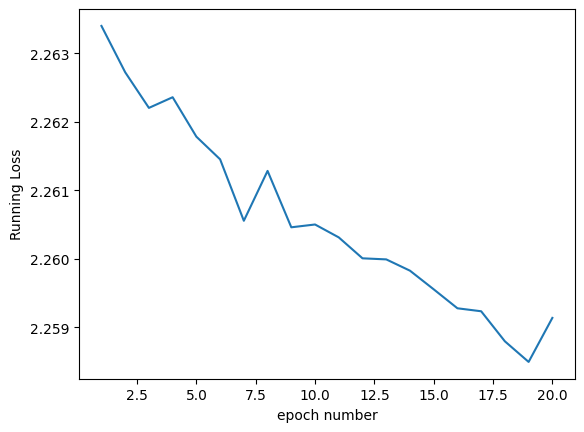

In [23]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size = 3,stride=1,padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64,kernel_size = 3,stride=1,padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size = 3,stride=1,padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.Sigmoid(),
    nn.Linear(512,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.015
[2] loss: 1.632
[3] loss: 1.431
[4] loss: 1.298
[5] loss: 1.182
[6] loss: 1.078
[7] loss: 0.988
[8] loss: 0.911
[9] loss: 0.843
[10] loss: 0.769
[11] loss: 0.706
[12] loss: 0.645
[13] loss: 0.582
[14] loss: 0.528
[15] loss: 0.474
[16] loss: 0.414
[17] loss: 0.353
[18] loss: 0.309
[19] loss: 0.250
[20] loss: 0.217
Finished training
Accuracy of the network on the 10000 test images: 91 %


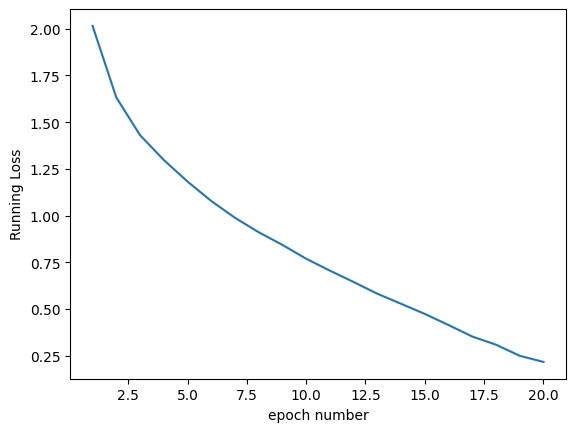

In [16]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size = 3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64,kernel_size = 3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size = 3,stride=1,padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.ReLU(),
    nn.Linear(512,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.820
[2] loss: 1.448
[3] loss: 1.278
[4] loss: 1.149
[5] loss: 1.041
[6] loss: 0.960
[7] loss: 0.894
[8] loss: 0.839
[9] loss: 0.790
[10] loss: 0.744
[11] loss: 0.699
[12] loss: 0.665
[13] loss: 0.614
[14] loss: 0.577
[15] loss: 0.540
[16] loss: 0.499
[17] loss: 0.464
[18] loss: 0.430
[19] loss: 0.393
[20] loss: 0.350
Finished training
Accuracy of the network on the 10000 test images: 86 %


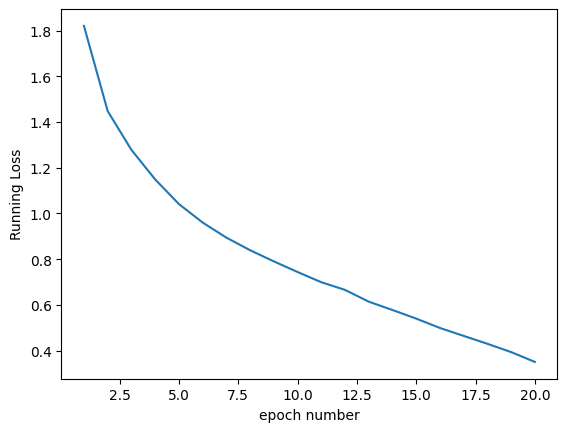

In [17]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size = 3,stride=1,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64,kernel_size = 3,stride=1,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size = 3,stride=1,padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.Tanh(),
    nn.Linear(512,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.654
[2] loss: 1.380
[3] loss: 1.301
[4] loss: 1.249
[5] loss: 1.202
[6] loss: 1.174
[7] loss: 1.144
[8] loss: 1.124
[9] loss: 1.099
[10] loss: 1.081
[11] loss: 1.073
[12] loss: 1.061
[13] loss: 1.048
[14] loss: 1.025
[15] loss: 1.023
[16] loss: 1.014
[17] loss: 1.018
[18] loss: 0.998
[19] loss: 0.988
[20] loss: 0.993
Finished training
Accuracy of the network on the 10000 test images: 65 %


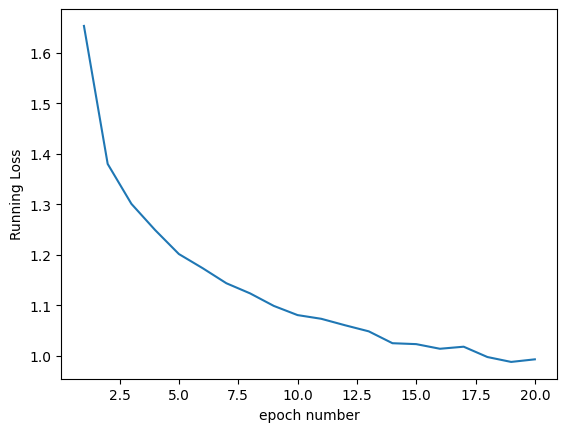

In [21]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.ReLU(),
    
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.561
[2] loss: 1.343
[3] loss: 1.257
[4] loss: 1.219
[5] loss: 1.206
[6] loss: 1.186
[7] loss: 1.173
[8] loss: 1.162
[9] loss: 1.176
[10] loss: 1.169
[11] loss: 1.155
[12] loss: 1.166
[13] loss: 1.158
[14] loss: 1.148
[15] loss: 1.150
[16] loss: 1.148
[17] loss: 1.168
[18] loss: 1.160
[19] loss: 1.160
[20] loss: 1.164
Finished training
Accuracy of the network on the 10000 test images: 59 %


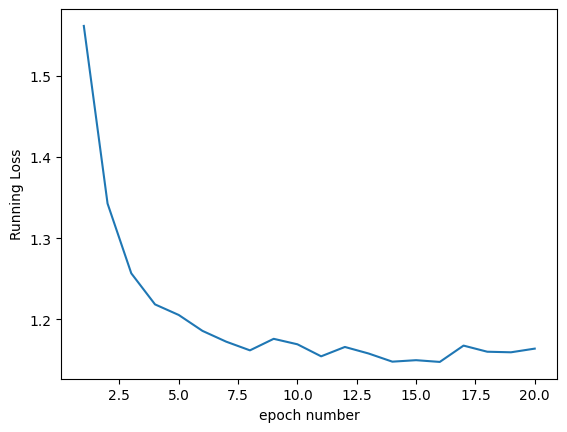

In [22]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Tanh(),
    
    nn.Linear(128,64),
    nn.Tanh(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.026
[2] loss: 1.630
[3] loss: 1.428
[4] loss: 1.311
[5] loss: 1.234
[6] loss: 1.168
[7] loss: 1.104
[8] loss: 1.050
[9] loss: 1.009
[10] loss: 0.972
[11] loss: 0.925
[12] loss: 0.885
[13] loss: 0.857
[14] loss: 0.826
[15] loss: 0.792
[16] loss: 0.761
[17] loss: 0.736
[18] loss: 0.710
[19] loss: 0.680
[20] loss: 0.656
Finished training
Accuracy of the network on the 10000 test images: 77 %


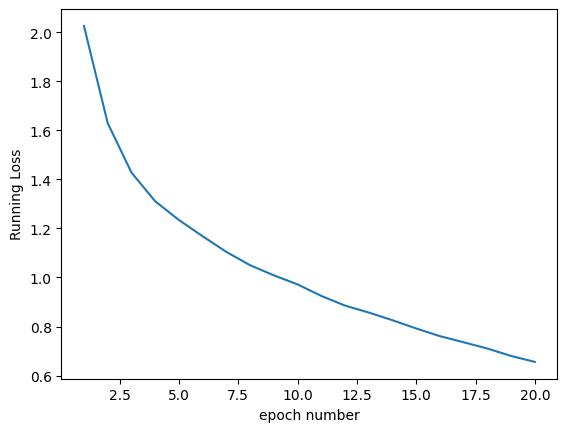

In [23]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Sigmoid(),
    
    nn.Linear(128,64),
    nn.Sigmoid(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.254
[2] loss: 2.108
[3] loss: 1.798
[4] loss: 1.620
[5] loss: 1.521
[6] loss: 1.437
[7] loss: 1.372
[8] loss: 1.316
[9] loss: 1.267
[10] loss: 1.220
[11] loss: 1.189
[12] loss: 1.148
[13] loss: 1.119
[14] loss: 1.098
[15] loss: 1.066
[16] loss: 1.045
[17] loss: 1.020
[18] loss: 1.000
[19] loss: 0.981
[20] loss: 0.959
Finished training
Accuracy of the network on the 10000 test images: 66 %


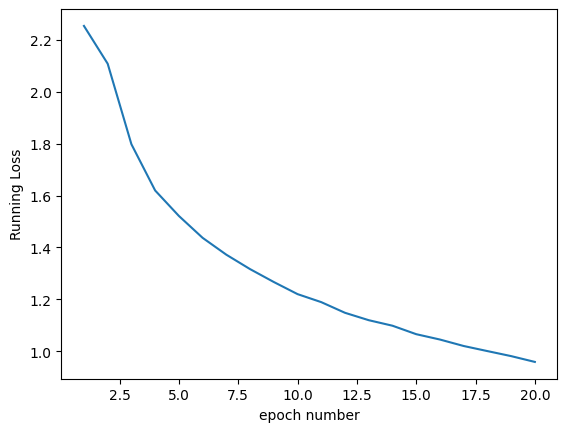

In [24]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.ReLU(),
    
    nn.Linear(128,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.108
[2] loss: 1.898
[3] loss: 1.706
[4] loss: 1.573
[5] loss: 1.478
[6] loss: 1.409
[7] loss: 1.358
[8] loss: 1.315
[9] loss: 1.282
[10] loss: 1.248
[11] loss: 1.214
[12] loss: 1.187
[13] loss: 1.163
[14] loss: 1.138
[15] loss: 1.117
[16] loss: 1.098
[17] loss: 1.079
[18] loss: 1.062
[19] loss: 1.049
[20] loss: 1.027
Finished training
Accuracy of the network on the 10000 test images: 62 %


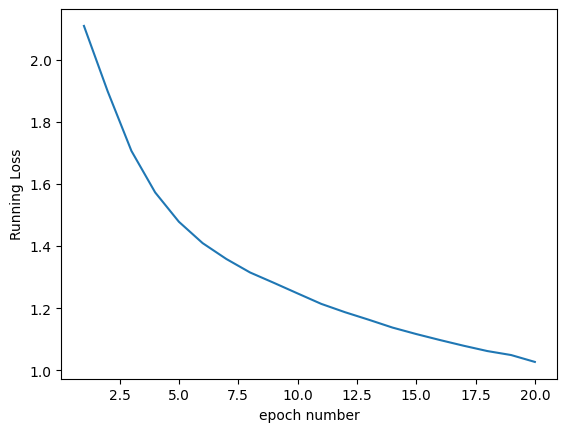

In [25]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Tanh(),
    
    nn.Linear(128,64),
    nn.Tanh(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.260
[2] loss: 2.257
[3] loss: 2.257
[4] loss: 2.257
[5] loss: 2.258
[6] loss: 2.257
[7] loss: 2.257
[8] loss: 2.257
[9] loss: 2.257
[10] loss: 2.257
[11] loss: 2.257
[12] loss: 2.257
[13] loss: 2.257
[14] loss: 2.258
[15] loss: 2.257
[16] loss: 2.257
[17] loss: 2.257
[18] loss: 2.257
[19] loss: 2.257
[20] loss: 2.257
Finished training
Accuracy of the network on the 10000 test images: 10 %


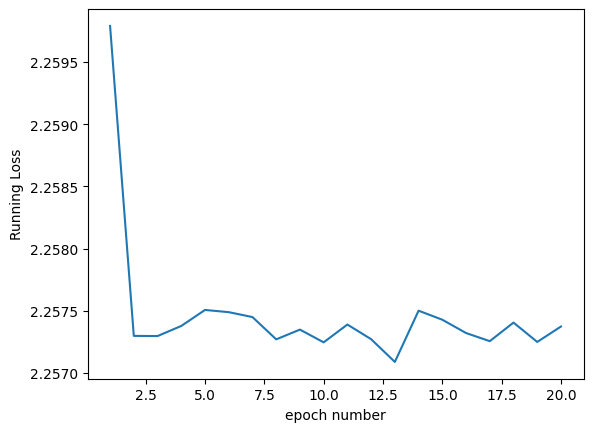

In [26]:
n = nn.Sequential(
    nn.Conv2d(3, 6, 5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(6,16,5),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),

    nn.Flatten(), 
    nn.Linear(16*5*5,128),
    nn.Sigmoid(),
    
    nn.Linear(128,64),
    nn.Sigmoid(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.880
[2] loss: 1.543
[3] loss: 1.462
[4] loss: 1.427
[5] loss: 1.379
[6] loss: 1.351
[7] loss: 1.322
[8] loss: 1.301
[9] loss: 1.281
[10] loss: 1.254
[11] loss: 1.246
[12] loss: 1.228
[13] loss: 1.217
[14] loss: 1.199
[15] loss: 1.179
[16] loss: 1.171
[17] loss: 1.153
[18] loss: 1.143
[19] loss: 1.128
[20] loss: 1.129
Finished training
Accuracy of the network on the 10000 test images: 61 %


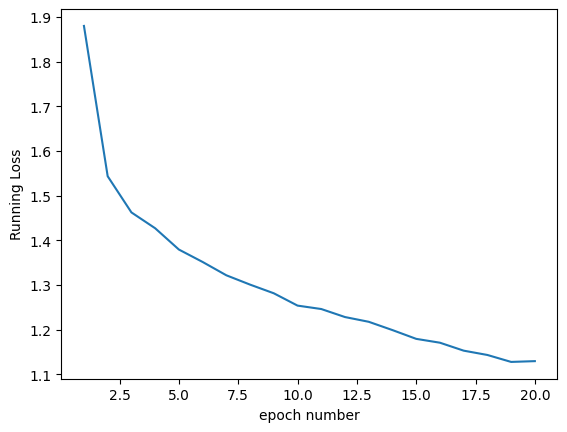

In [27]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.ReLU(),
    
    nn.Linear(512,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.804
[2] loss: 1.554
[3] loss: 1.521
[4] loss: 1.492
[5] loss: 1.479
[6] loss: 1.481
[7] loss: 1.461
[8] loss: 1.469
[9] loss: 1.468
[10] loss: 1.487
[11] loss: 1.471
[12] loss: 1.520
[13] loss: 1.483
[14] loss: 1.489
[15] loss: 1.498
[16] loss: 1.492
[17] loss: 1.505
[18] loss: 1.505
[19] loss: 1.513
[20] loss: 1.488
Finished training
Accuracy of the network on the 10000 test images: 43 %


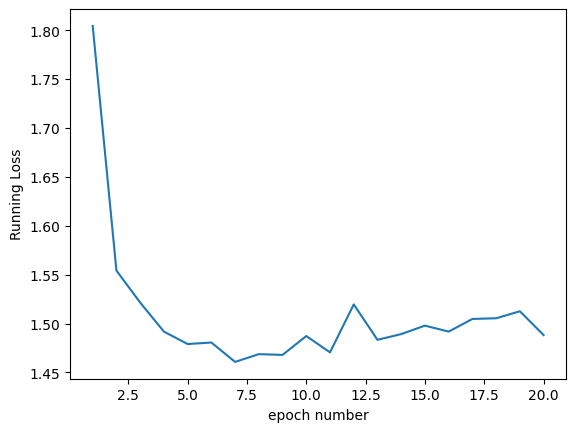

In [28]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size=3, stride=1, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.Tanh(),
    
    nn.Linear(512,64),
    nn.Tanh(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.263
[2] loss: 2.259
[3] loss: 2.259
[4] loss: 2.259
[5] loss: 2.259
[6] loss: 2.259
[7] loss: 2.258
[8] loss: 2.258
[9] loss: 2.258
[10] loss: 2.258
[11] loss: 2.258
[12] loss: 2.258
[13] loss: 2.258
[14] loss: 2.258
[15] loss: 2.258
[16] loss: 2.258
[17] loss: 2.258
[18] loss: 2.258
[19] loss: 2.258
[20] loss: 2.258
Finished training
Accuracy of the network on the 10000 test images: 10 %


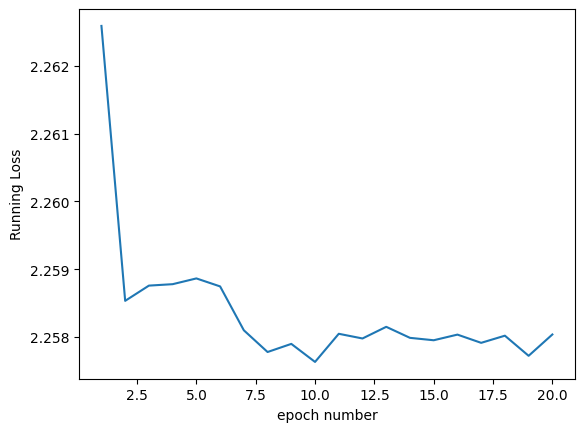

In [29]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size=3, stride=1, padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.Sigmoid(),
    
    nn.Linear(512,64),
    nn.Sigmoid(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.252
[2] loss: 2.102
[3] loss: 1.751
[4] loss: 1.553
[5] loss: 1.448
[6] loss: 1.358
[7] loss: 1.290
[8] loss: 1.216
[9] loss: 1.153
[10] loss: 1.077
[11] loss: 1.017
[12] loss: 0.953
[13] loss: 0.904
[14] loss: 0.849
[15] loss: 0.805
[16] loss: 0.763
[17] loss: 0.714
[18] loss: 0.676
[19] loss: 0.632
[20] loss: 0.590
Finished training
Accuracy of the network on the 10000 test images: 79 %


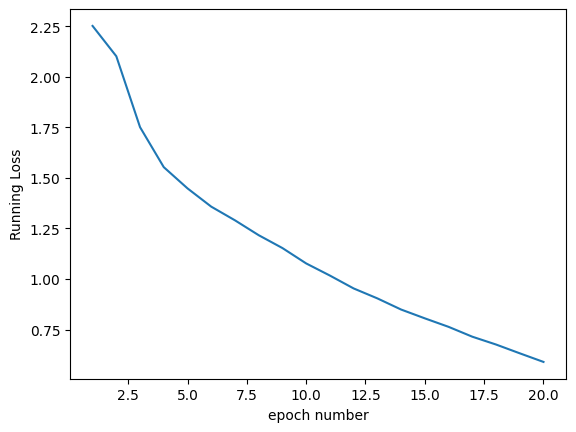

In [30]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.ReLU(),
    
    nn.Linear(512,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.076
[2] loss: 1.758
[3] loss: 1.536
[4] loss: 1.415
[5] loss: 1.323
[6] loss: 1.241
[7] loss: 1.167
[8] loss: 1.099
[9] loss: 1.040
[10] loss: 0.981
[11] loss: 0.934
[12] loss: 0.887
[13] loss: 0.849
[14] loss: 0.810
[15] loss: 0.777
[16] loss: 0.739
[17] loss: 0.709
[18] loss: 0.681
[19] loss: 0.651
[20] loss: 0.624
Finished training
Accuracy of the network on the 10000 test images: 78 %


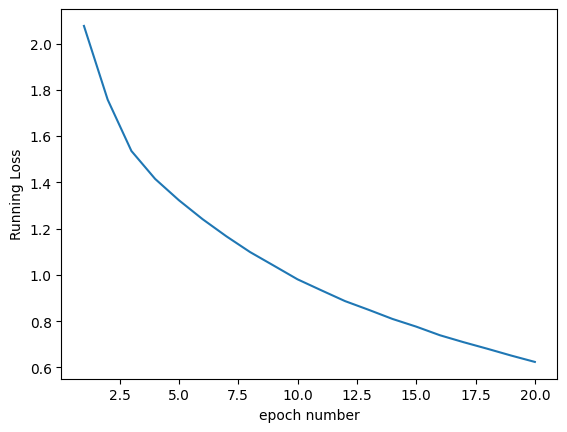

In [31]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size=3, stride=1, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.Tanh(),
    
    nn.Linear(512,64),
    nn.Tanh(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.259
[2] loss: 2.258
[3] loss: 2.257
[4] loss: 2.257
[5] loss: 2.258
[6] loss: 2.257
[7] loss: 2.258
[8] loss: 2.257
[9] loss: 2.257
[10] loss: 2.257
[11] loss: 2.257
[12] loss: 2.257
[13] loss: 2.257
[14] loss: 2.257
[15] loss: 2.258
[16] loss: 2.257
[17] loss: 2.257
[18] loss: 2.257
[19] loss: 2.257
[20] loss: 2.257
Finished training
Accuracy of the network on the 10000 test images: 10 %


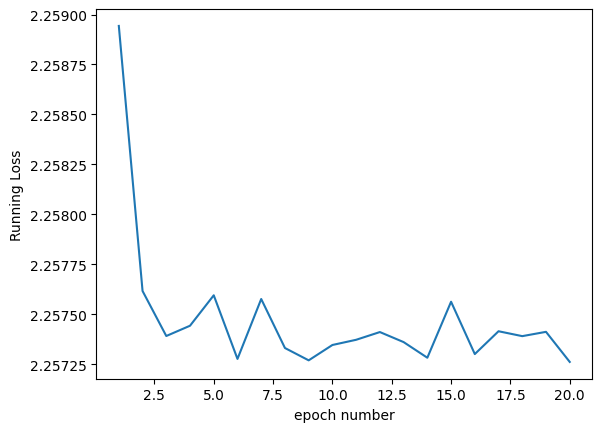

In [32]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size=3, stride=1, padding=1),
    nn.Sigmoid(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.Sigmoid(),
    
    nn.Linear(512,64),
    nn.Sigmoid(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01,momentum=0.8)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 2.150
[2] loss: 1.803
[3] loss: 1.578
[4] loss: 1.442
[5] loss: 1.332
[6] loss: 1.218
[7] loss: 1.117
[8] loss: 1.020
[9] loss: 0.935
[10] loss: 0.858
[11] loss: 0.783
[12] loss: 0.707
[13] loss: 0.650
[14] loss: 0.590
[15] loss: 0.527
[16] loss: 0.463
[17] loss: 0.402
[18] loss: 0.346
[19] loss: 0.292
[20] loss: 0.242
Finished training
Accuracy of the network on the 10000 test images: 93 %


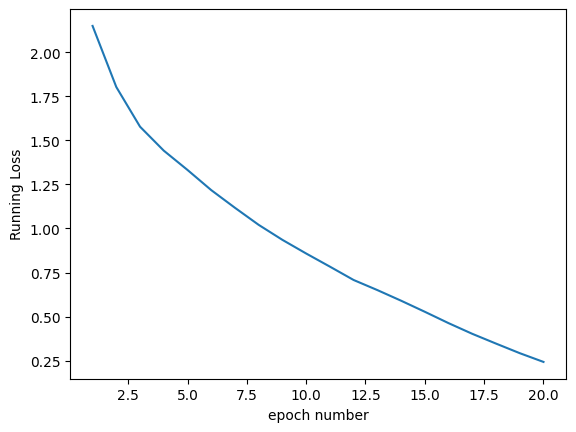

In [18]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size=3, stride=1, padding=1),
    nn.ReLU(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.ReLU(),
    
    nn.Linear(512,64),
    nn.ReLU(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 

[1] loss: 1.916
[2] loss: 1.508
[3] loss: 1.338
[4] loss: 1.193
[5] loss: 1.076
[6] loss: 0.991
[7] loss: 0.916
[8] loss: 0.850
[9] loss: 0.800
[10] loss: 0.750
[11] loss: 0.702
[12] loss: 0.660
[13] loss: 0.620
[14] loss: 0.581
[15] loss: 0.539
[16] loss: 0.501
[17] loss: 0.465
[18] loss: 0.424
[19] loss: 0.385
[20] loss: 0.350
Finished training
Accuracy of the network on the 10000 test images: 85 %


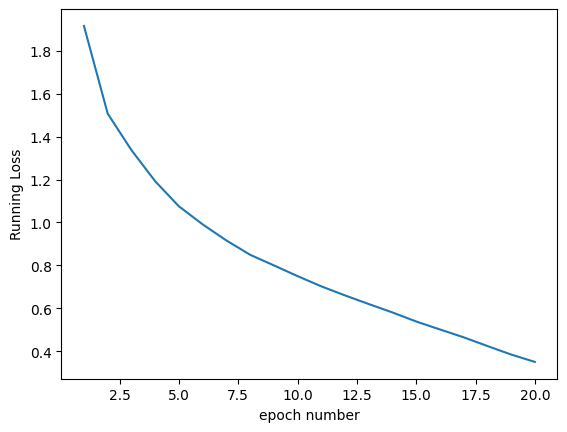

In [19]:
n = nn.Sequential(
    nn.Conv2d(3, 32, kernel_size=3, stride=1, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2),
    
    nn.Conv2d(32,64, kernel_size=3, stride=1, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2,2),
    
    nn.Conv2d(64,128,kernel_size=3, stride=1, padding=1),
    nn.Tanh(),
    nn.MaxPool2d(2, 2), 

    nn.Flatten(), 
    nn.Linear(128 * 4 * 4,512),
    nn.Tanh(),
    
    nn.Linear(512,64),
    nn.Tanh(),
    nn.Linear(64,10)
)

model = Cnn(network=n).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.1)

model,l = train(model,20,optimizer,criterion)
acc = test(model)
plotGraph(l) 